# **MSE 433 Project Part I : Airline Passenger Satisfaction - Data Analysis/Visualization and Predictive Modeling**

# I. Intro and Preparation

## **Import and upload**


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Upload and read csv file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_url = "https://drive.google.com/uc?export=download&id=1y3fqkcL8evbnDVflXliNygQZQuLk3dTP"
df = pd.read_csv(file_url)

## **Data Exploration**

In [ ]:
# Display basic information
print(f"Dataset Shape: {df.shape}")
print("\nData Types:")

Dataset Shape: (129880, 24)

Data Types:


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Enterta

In [ ]:
# Display basic statistics
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
                  ID            Age  Flight Distance  Departure Delay  \
count  129880.000000  129880.000000    129880.000000    129880.000000   
mean    64940.500000      39.427957      1190.316392        14.713713   
std     37493.270818      15.119360       997.452477        38.071126   
min         1.000000       7.000000        31.000000         0.000000   
25%     32470.750000      27.000000       414.000000         0.000000   
50%     64940.500000      40.000000       844.000000         0.000000   
75%     97410.250000      51.000000      1744.000000        12.000000   
max    129880.000000      85.000000      4983.000000      1592.000000   

       Arrival Delay  Departure and Arrival Time Convenience  \
count  129487.000000                           129880.000000   
mean       15.091129                                3.057599   
std        38.465650                                1.526741   
min         0.000000                                0.000000   
25%

In [ ]:
# Display the first few rows
print(df.head())

   ID  Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0   1    Male   48    First-time       Business  Business              821   
1   2  Female   35     Returning       Business  Business              821   
2   3    Male   41     Returning       Business  Business              853   
3   4    Male   50     Returning       Business  Business             1905   
4   5  Female   49     Returning       Business  Business             3470   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   
1               26           39.0                                       2   
2                0            0.0                                       4   
3                0            0.0                                       2   
4                0            1.0                                       3   

   ...  On-board Service  Seat Comfort  Leg Room Service  Cleanlines

**Findings**
1. The dataset contains information about airline passengers and their satisfaction ratings."
2. Key features include demographic information, travel details, and service ratings.
3. The target variable is the 'satisfaction' column which indicates whether a passenger was satisfied or not.
4. Most variables are on a rating scale (0-5), while others are categorical.
5. This rich dataset allows us to explore multiple aspects of the passenger experience.

## **Data Processing**

In [ ]:
# Handle missing values if any
df = df.dropna()
print(f"Rows after dropping missing values: {df.shape[0]}")

Rows after dropping missing values: 129487


In [ ]:
# Encode the target variable
df['Satisfaction'] = df['Satisfaction'].map({'Satisfied': 1, 'Neutral or Dissatisfied': 0})

<ipython-input-275-30c280975d4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Satisfaction'] = df['Satisfaction'].map({'Satisfied': 1, 'Neutral or Dissatisfied': 0})


In [ ]:
# Display the cleaned dataset
print(df.head(10))

   ID  Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0   1    Male   48    First-time       Business  Business              821   
1   2  Female   35     Returning       Business  Business              821   
2   3    Male   41     Returning       Business  Business              853   
3   4    Male   50     Returning       Business  Business             1905   
4   5  Female   49     Returning       Business  Business             3470   
5   6    Male   43     Returning       Business  Business             3788   
6   7    Male   43     Returning       Business  Business             1963   
7   8  Female   60     Returning       Business  Business              853   
8   9    Male   50     Returning       Business  Business             2607   
9  10  Female   38     Returning       Business  Business             2822   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                               

# II. Data Visualization and Analysis

## **Distribution of Satisfaction**

<ipython-input-277-58b8e60154ce>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Satisfaction', data=df, palette='Set2')


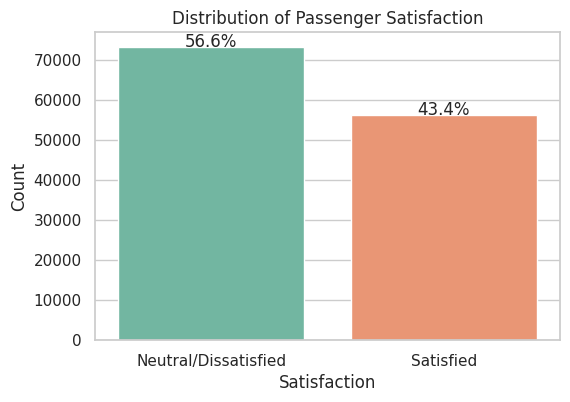

In [ ]:
# Set up the style for visualizations
sns.set(style="whitegrid")

# Distribution of Satisfaction
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Satisfaction', data=df, palette='Set2')

# Add percentages on top of the bars
total = len(df)  # Total number of passengers
for p in ax.patches:
    height = p.get_height()  # Height of the bar
    ax.text(p.get_x() + p.get_width() / 2., height + 50,  # Position of the text
            f'{height / total * 100:.1f}%',  # Percentage calculation
            ha='center', fontsize=12)

# Add labels and title
plt.xticks(ticks=[0, 1], labels=['Neutral/Dissatisfied', 'Satisfied'])
plt.title('Distribution of Passenger Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

Finding: The dataset has a relatively balanced distribution of satisfaction, which is good for predictive modeling

## **Distribution of Age**

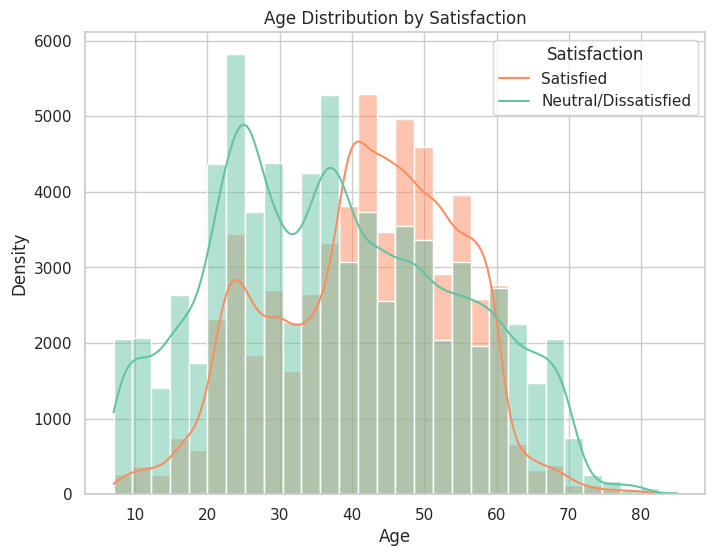

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', hue='Satisfaction', kde=True, palette='Set2', bins=30)
plt.title('Age Distribution by Satisfaction')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Satisfaction', labels=['Satisfied','Neutral/Dissatisfied'])
plt.show()

In [ ]:
# Age distribution findings
age_by_satisfaction = df.groupby('Satisfaction')['Age'].agg(['mean', 'median', 'std'])
print("Findings")
print(f"- Mean age of satisfied passengers: {age_by_satisfaction.loc[1, 'mean']:.1f} years")
print(f"- Mean age of dissatisfied passengers: {age_by_satisfaction.loc[0, 'mean']:.1f} years")
print("- Younger passengers (20-40 years) tend to have higher dissatisfaction rates, while older passengers (40-60 years) are more likely to be satisfied.")
print("- The age distributions overlap significantly, suggesting age alone is not a strong predictor")

Findings
- Mean age of satisfied passengers: 41.7 years
- Mean age of dissatisfied passengers: 37.7 years
- Younger passengers (20-40 years) tend to have higher dissatisfaction rates, while older passengers (40-60 years) are more likely to be satisfied.
- The age distributions overlap significantly, suggesting age alone is not a strong predictor


## **Service Ratings Analysis**

<ipython-input-280-f17496fd4b45>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Satisfaction', y=column, data=df, palette='Set2')  # Use correct column name
<ipython-input-280-f17496fd4b45>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Satisfaction', y=column, data=df, palette='Set2')  # Use correct column name
<ipython-input-280-f17496fd4b45>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Satisfaction', y=column, data=df, palette='Set2')  # Use correct column name
<ipython-input-280-f17496fd4b45>:21: FutureWarning: 

Pass

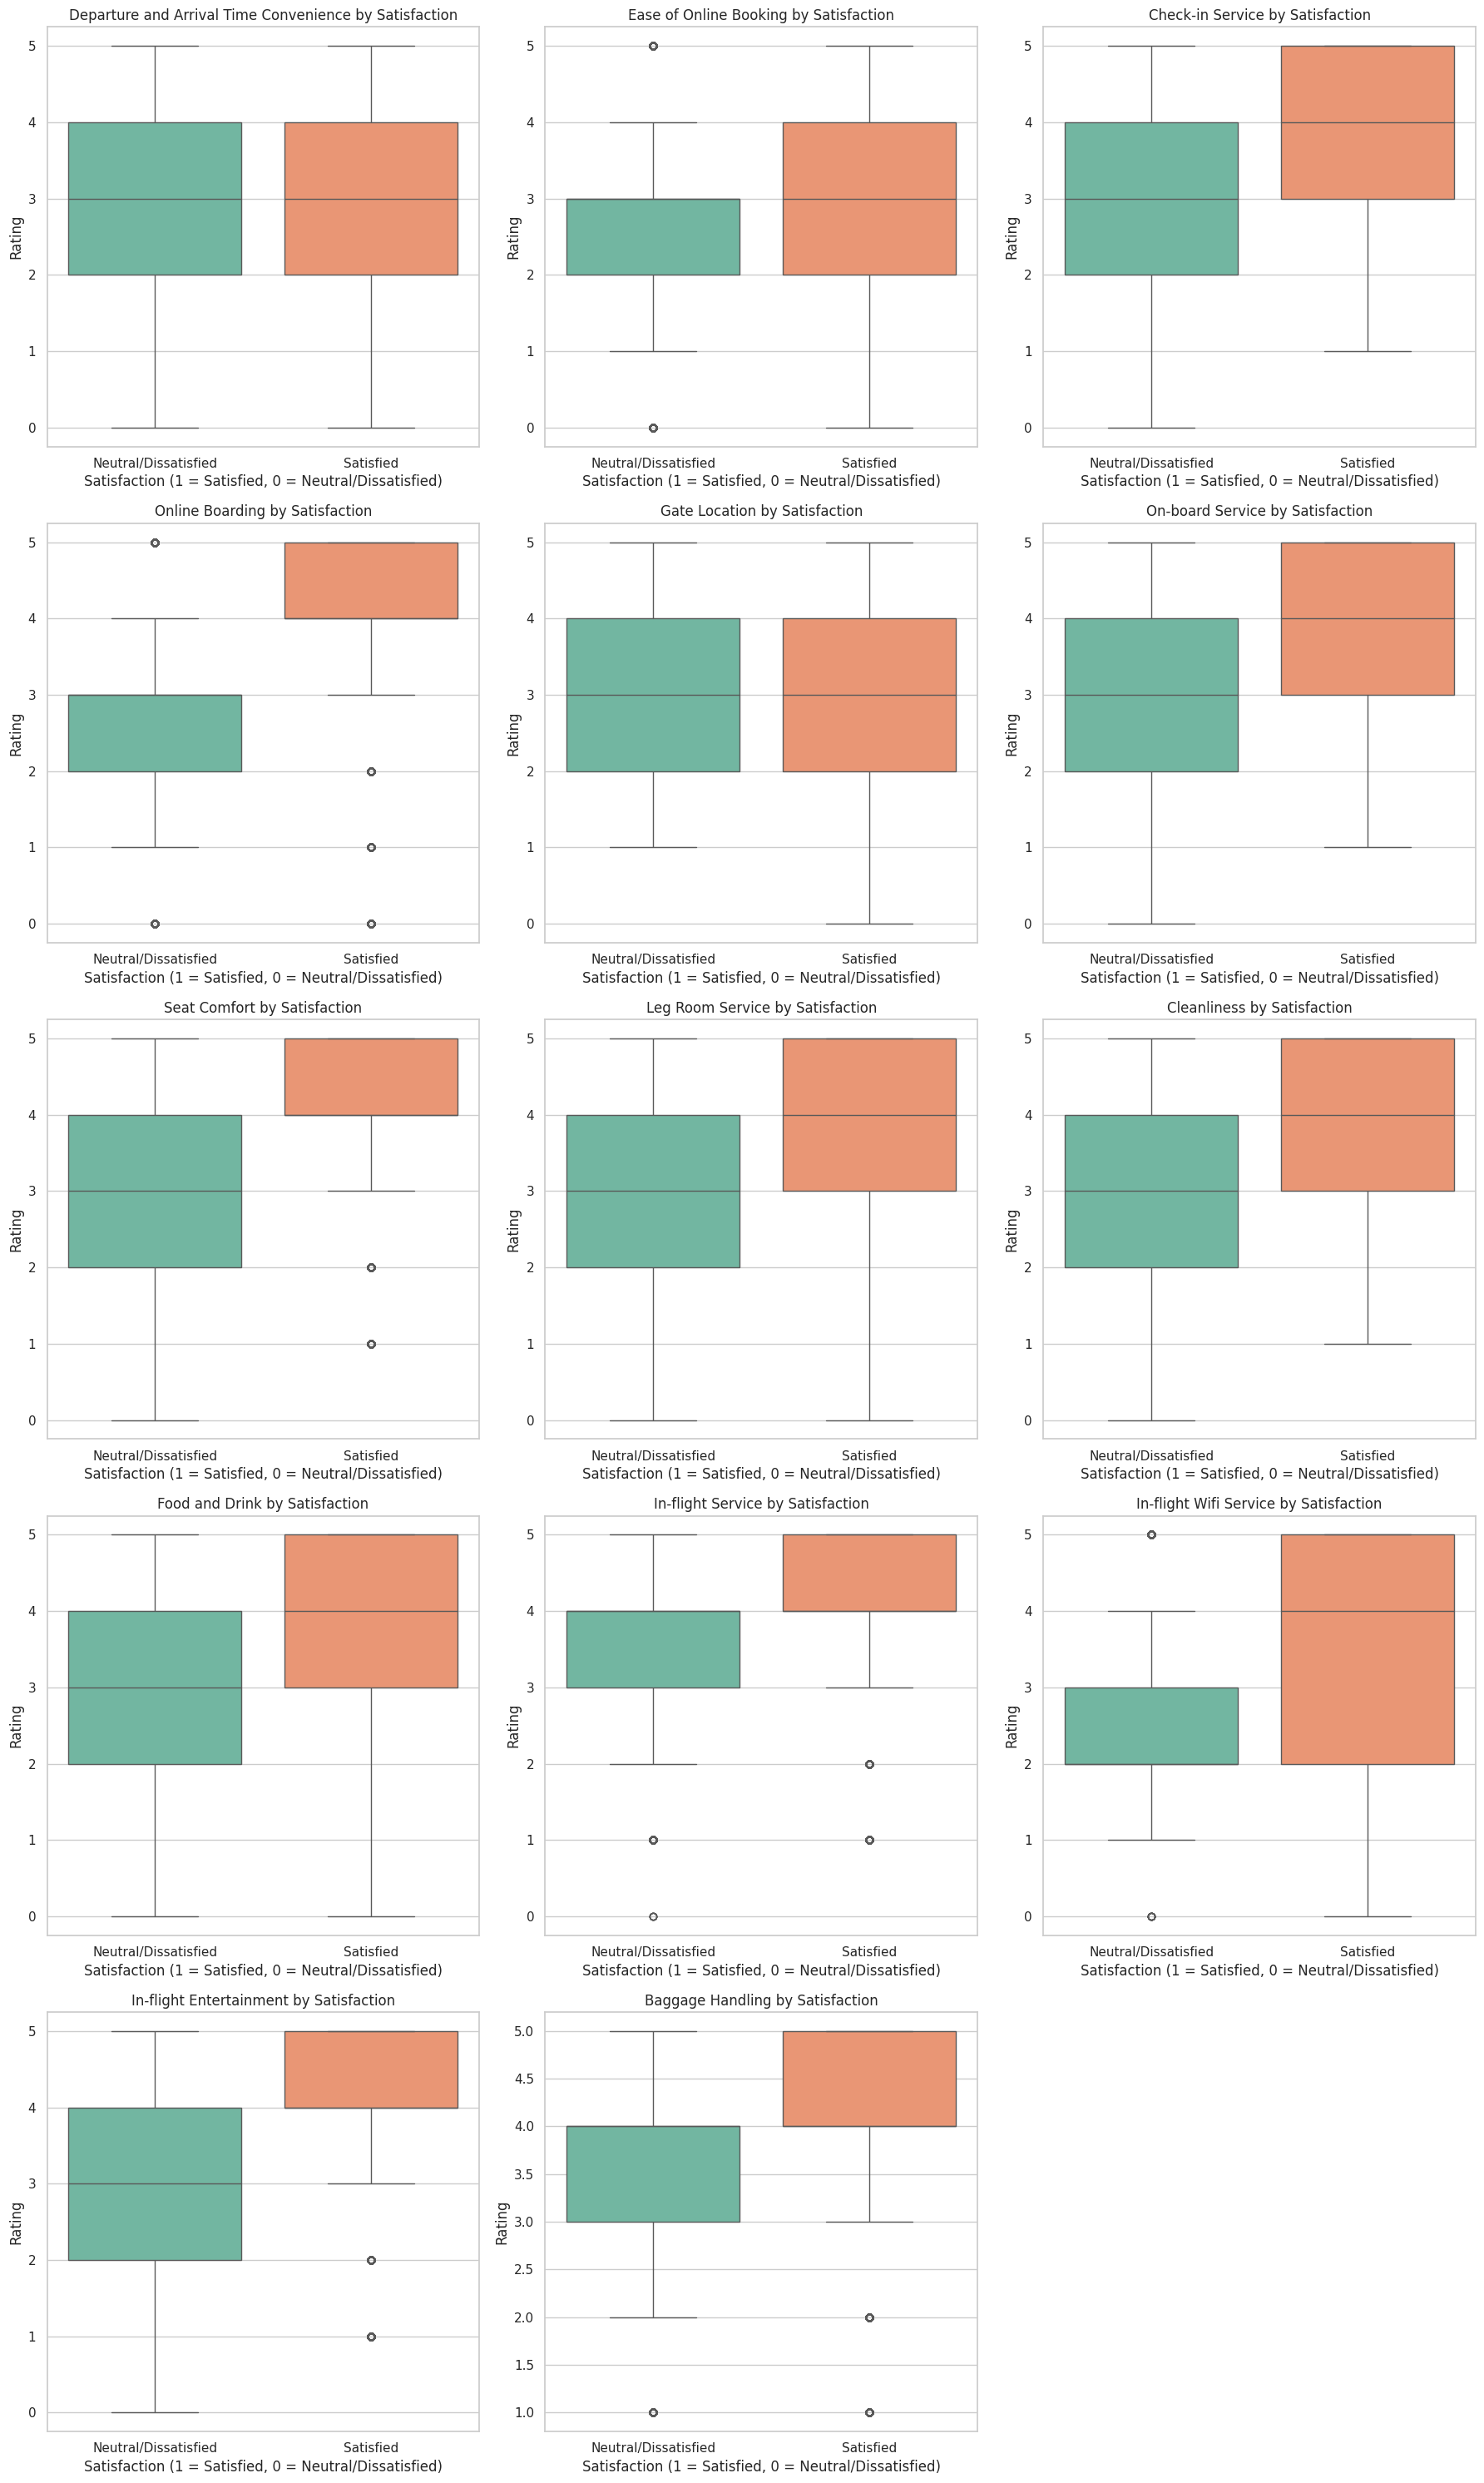

In [ ]:
# List of service rating columns
service_columns = [
    'Departure and Arrival Time Convenience', 'Ease of Online Booking',
    'Check-in Service', 'Online Boarding', 'Gate Location',
    'On-board Service', 'Seat Comfort', 'Leg Room Service',
    'Cleanliness', 'Food and Drink', 'In-flight Service',
    'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling'
]

# Filter service_columns to only include columns that exist in the dataset
service_columns = [col for col in service_columns if col in df.columns]

# Calculate the number of rows and columns needed for subplots
num_columns = 3  # Number of columns in the subplot grid
num_rows = (len(service_columns) + num_columns - 1) // num_columns  # Calculate rows dynamically

# Create a figure with subplots
plt.figure(figsize=(18, 6 * num_rows))  # Adjust figure size based on the number of rows
for i, column in enumerate(service_columns, 1):
    plt.subplot(num_rows, num_columns, i)  # Dynamically adjust subplot grid
    sns.boxplot(x='Satisfaction', y=column, data=df, palette='Set2')  # Use correct column name
    plt.title(f'{column} by Satisfaction')
    plt.xticks(ticks=[0, 1], labels=['Neutral/Dissatisfied', 'Satisfied'])
    plt.xlabel('Satisfaction (1 = Satisfied, 0 = Neutral/Dissatisfied)')
    plt.ylabel('Rating')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [ ]:
# Calculating the difference in ratings between satisfied/dissatisfied for each service
service_ratings_by_satisfaction = df.groupby('Satisfaction')[service_columns].mean()
rating_diff = service_ratings_by_satisfaction.loc[1] - service_ratings_by_satisfaction.loc[0]

# Sorting the differences in descending order
rating_diff_sorted = rating_diff.sort_values(ascending = False)
print("Rating differences between satisfied/dissatisfied customers")
print(rating_diff_sorted)

Rating differences between satisfied/dissatisfied customers
Online Boarding                           1.366802
In-flight Entertainment                   1.072109
Seat Comfort                              0.927651
On-board Service                          0.836905
Leg Room Service                          0.829881
Cleanliness                               0.813283
In-flight Wifi Service                    0.759665
Check-in Service                          0.605741
Baggage Handling                          0.591957
In-flight Service                         0.581615
Food and Drink                            0.566536
Ease of Online Booking                    0.477043
Gate Location                            -0.007539
Departure and Arrival Time Convenience   -0.167732
dtype: float64


In [ ]:
# Showing mean service ratings score for each service type
from tabulate import tabulate
# Convert to a table format with tabulate
print(tabulate(service_ratings_by_satisfaction, headers='keys', tablefmt='pretty'))

+--------------+----------------------------------------+------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------------+-------------------------+-------------------+
| Satisfaction | Departure and Arrival Time Convenience | Ease of Online Booking |  Check-in Service  |  Online Boarding   |   Gate Location    |  On-board Service  |    Seat Comfort    |  Leg Room Service  |    Cleanliness     |   Food and Drink   | In-flight Service  | In-flight Wifi Service | In-flight Entertainment | Baggage Handling  |
+--------------+----------------------------------------+------------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------------+------------------

**Findings**

* There's a clear separation in ratings between satisfied and dissatisfied passengers
* Online Boarding, In-flight Entertainment, Seat Comfort show the largest rating differences
* On-board Service, Leg Room Service, Cleanliness also have high rating differences
* Departure/Arrival Time Convenience and Gate Location show the smallest rating differences

This suggests that areas such as Online Boarding, In-flight Entertainment, Seat Comfort, On-board Service, Leg Room Service, Cleanliness are key to customer satisfaction and should be prioritized

## **Correlation Heatmap**

To further analyze relationships between service ratings and satisfaction, let us create a correlation heatmap

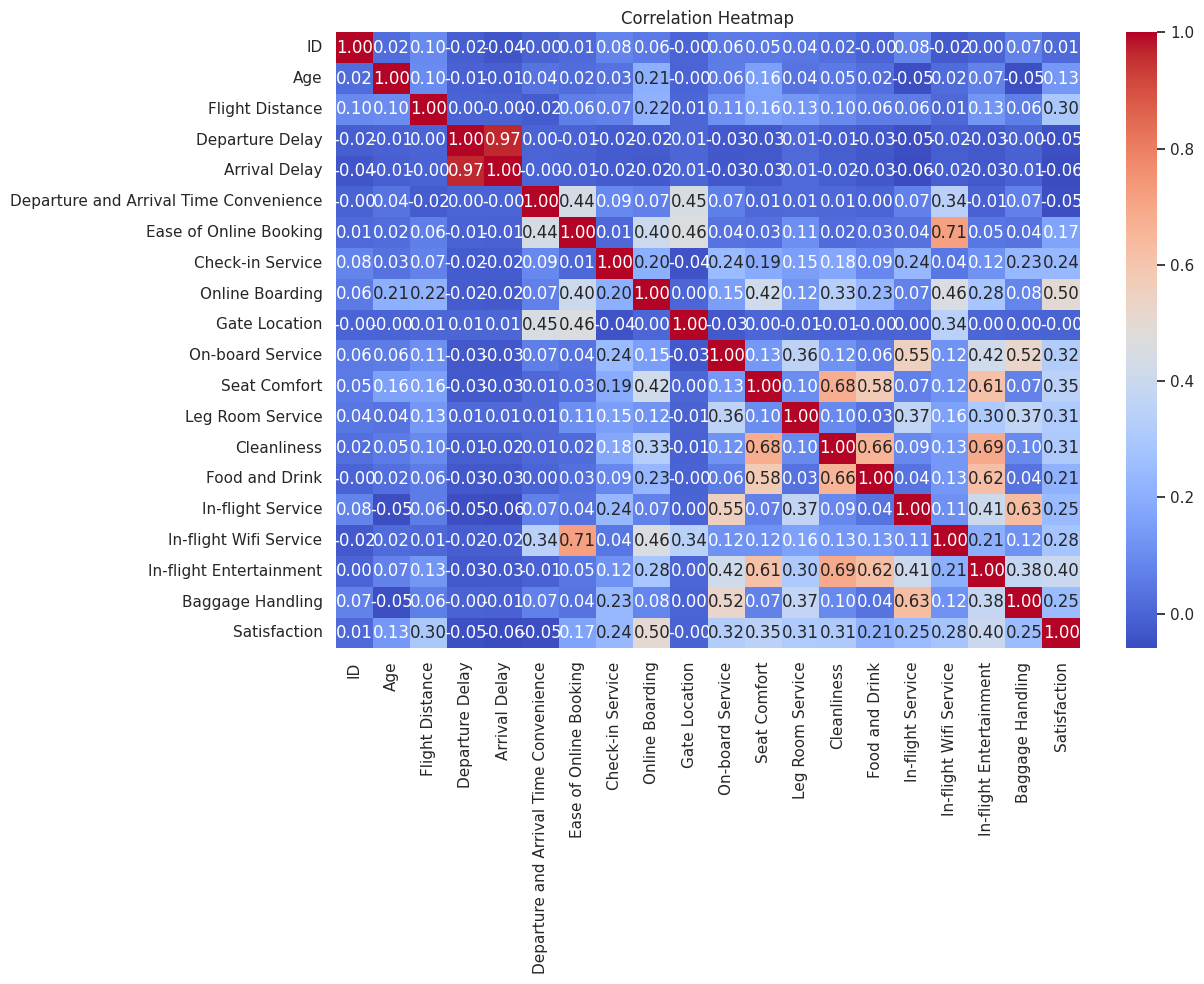

In [ ]:
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Correlation findings
target_correlations = corr_matrix['Satisfaction'].sort_values(ascending=False)
print("Findings")
print("Top 5 features most correlated with satisfaction:")
for i, (feature, corr) in enumerate(target_correlations.head(6).items()):
    if feature != 'Satifcation':  # Skip the self-correlation
        print(f"{i+1}. {feature}: {corr:.3f}")

print("\nBottom 5 features least correlated with satisfaction:")
for i, (feature, corr) in enumerate(target_correlations.tail(5).items()):
    print(f"{i+1}. {feature}: {corr:.3f}")

Findings
Top 5 features most correlated with satisfaction:
1. Satisfaction: 1.000
2. Online Boarding: 0.502
3. In-flight Entertainment: 0.398
4. Seat Comfort: 0.349
5. On-board Service: 0.322
6. Leg Room Service: 0.313

Bottom 5 features least correlated with satisfaction:
1. ID: 0.013
2. Gate Location: -0.003
3. Departure Delay: -0.051
4. Departure and Arrival Time Convenience: -0.054
5. Arrival Delay: -0.058


The findings are inline with what we find with service ratings, with the introduction of **departure delay / arrival delay** which wasn't analyzed previously.

Surprisingly, arrival and departure delay doesn't seem to play a huge part in customer satisfaction. However, this might be due to the fact that this data might not include many delays, thus not giving the correct information.

## **Satisfaction by Travel Class**

<Figure size 1000x600 with 0 Axes>

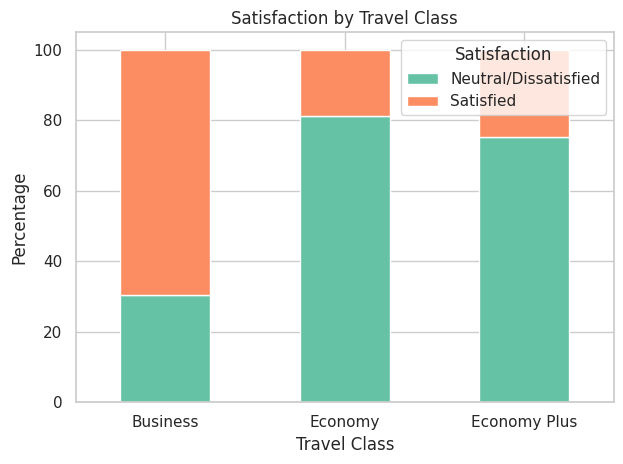

In [ ]:
# Satisfaction by Travel Class
plt.figure(figsize=(10, 6))
class_satisfaction = pd.crosstab(df['Class'], df['Satisfaction'], normalize='index') * 100
class_satisfaction.plot(kind='bar', stacked=True, color=sns.color_palette('Set2'))
plt.title('Satisfaction by Travel Class')
plt.xlabel('Travel Class')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
# Modify legend to show "Dissatisfied" for 0 and "Satisfied" for 1
plt.legend(title='Satisfaction', labels=['Neutral/Dissatisfied','Satisfied'])
plt.tight_layout()
plt.show()

**Findings**
* Clear correlation between premium service and higher satisfaction"
* Passengers in **Business Class** are more likely to be satisfied compared to those in **Economy Class**. **Eco Plus** passengers show a mix of satisfaction levels, but dissatisfaction is still prevalent.
* Discussion: Travel class is a strong predictor of satisfaction, likely due to better services and amenities offered in higher classes. Airlines should focus on improving the experience for Economy and Eco Plus passengers.

## **Satisfaction by Flight Distance**

<ipython-input-286-b94aa48f58d9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Satisfaction', y='Flight Distance', data=df, palette='Set2')


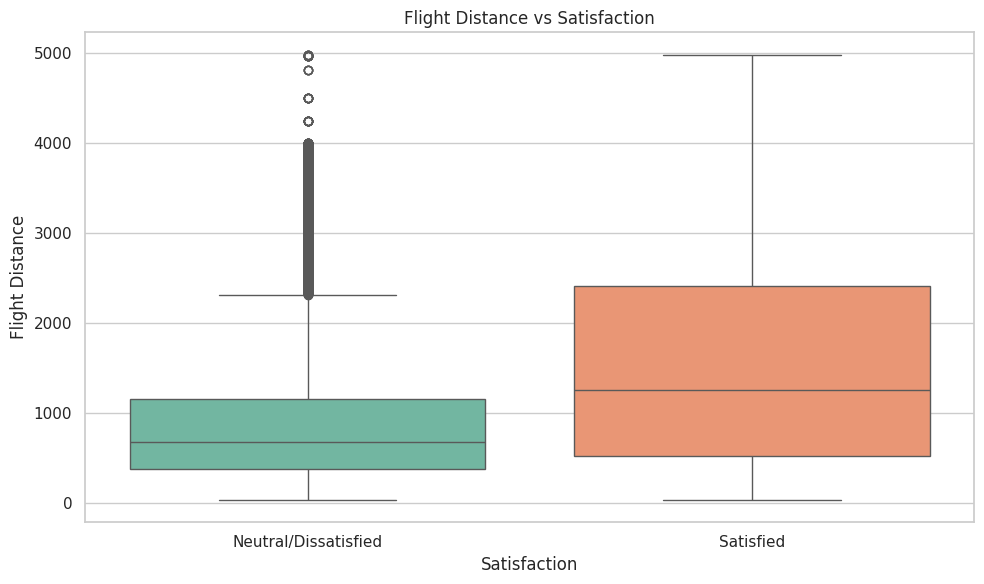

In [ ]:
# Satisfaction by Travel Class
plt.figure(figsize=(10, 6))
sns.boxplot(x='Satisfaction', y='Flight Distance', data=df, palette='Set2')
plt.xticks(ticks=[0, 1], labels=['Neutral/Dissatisfied', 'Satisfied'])
plt.title('Flight Distance vs Satisfaction')
plt.tight_layout()
plt.show()

In [ ]:
# Flight distance findings
distance_by_satisfaction = df.groupby('Satisfaction')['Flight Distance'].agg(['mean', 'median', 'std'])

print("Findings")
print(f"- Mean distance for satisfied passengers: {distance_by_satisfaction.loc[1, 'mean']:.1f} miles")
print(f"- Mean distance for dissatisfied passengers: {distance_by_satisfaction.loc[0, 'mean']:.1f} miles")

Findings
- Mean distance for satisfied passengers: 1529.6 miles
- Mean distance for dissatisfied passengers: 929.5 miles


**Findings**
* Longer flights have slightly higher satisfaction, although not huge
* This is potentially due to better services and such on longer flights

# III. Predictive Analytics

## **Import libraries and Data preparation**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
import warnings

In [ ]:
# Drop rows with missing values (if any)
df = df.dropna()

In [ ]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'], drop_first=True)

In [ ]:
df.head()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,...,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Gender_Male,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus
0,1,48,821,2,5.0,3,3,4,3,3,...,5,3,5,5,0,True,False,False,False,False
1,2,35,821,26,39.0,2,2,3,5,2,...,5,2,5,5,1,False,True,False,False,False
2,3,41,853,0,0.0,4,4,4,5,4,...,3,4,3,3,1,True,True,False,False,False
3,4,50,1905,0,0.0,2,2,3,4,2,...,5,2,5,5,1,True,True,False,False,False
4,5,49,3470,0,1.0,3,3,3,5,3,...,3,3,3,3,1,False,True,False,False,False


In [ ]:
# Split data into features and target
X = df.drop('Satisfaction', axis=1)
y = df['Satisfaction']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Logistic Regression**

In [ ]:
# Train Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Evaluate
y_pred_log = log_reg.predict(X_test)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     14685
           1       0.87      0.84      0.85     11213

    accuracy                           0.87     25898
   macro avg       0.87      0.87      0.87     25898
weighted avg       0.87      0.87      0.87     25898



In [ ]:
# ROC-AUC Score
y_pred_prob_log = log_reg.predict_proba(X_test)[:, 1]
print("Logistic Regression ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob_log))

Logistic Regression ROC-AUC Score: 0.9247440946095298


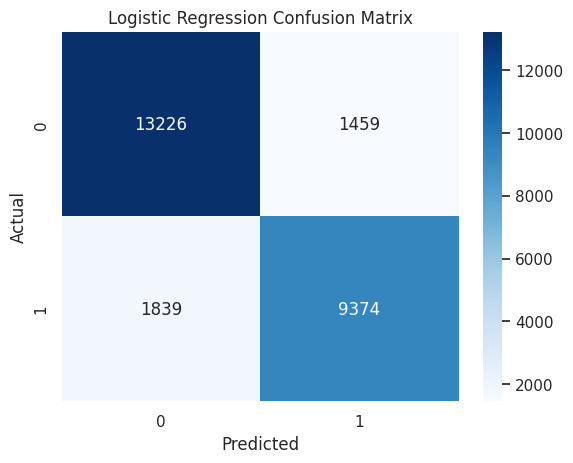

In [ ]:
# Confusion Matrix
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(conf_matrix_log, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<ipython-input-297-b3b3cc5cd71e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Absolute Coefficient', y='Feature', data=log_reg_coef.head(10), palette='viridis')


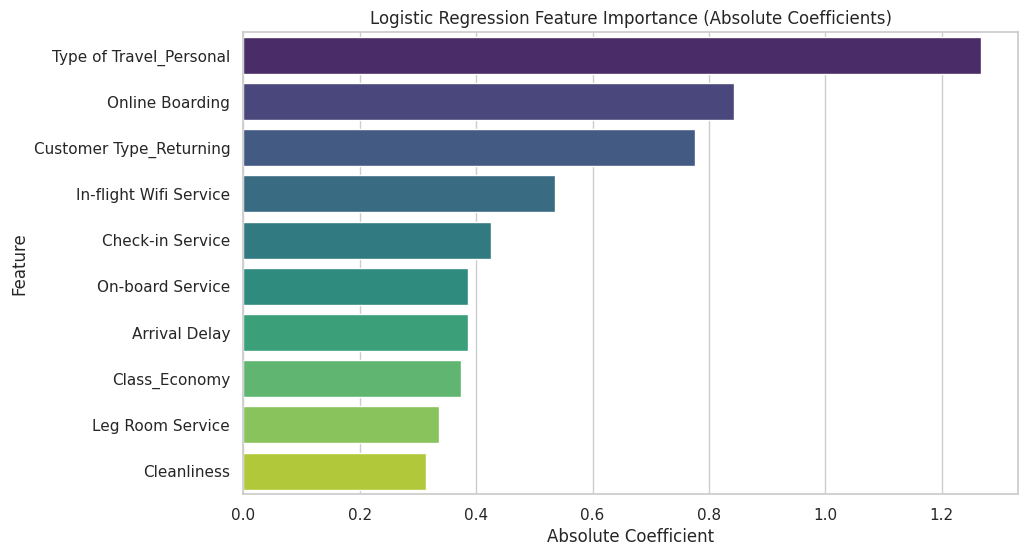

In [ ]:
# Feature Importance for Logistic Regression
log_reg_coef = pd.DataFrame({'Feature': X.columns, 'Coefficient': log_reg.coef_[0]})
log_reg_coef['Absolute Coefficient'] = log_reg_coef['Coefficient'].abs()
log_reg_coef = log_reg_coef.sort_values(by='Absolute Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Absolute Coefficient', y='Feature', data=log_reg_coef.head(10), palette='viridis')
plt.title('Logistic Regression Feature Importance (Absolute Coefficients)')
plt.show()


**Findings**

* Accuracy: ~87%, ROC-AUC Score: 92%. The model performs well (correctly predicts satisfaction level for 87% passengers)
* Model performs well for both class, no big difference
* The recall for satisfied passengers (0.84) is slightly lower than for neutral/dissatisfied passengers (0.90). This suggests that the model is better at identifying dissatisfied passengers than satisfied ones.

To improve recall for satisfied passengers, in the future we could consider:

* Balancing the dataset (e.g., using oversampling or class weighting).

* Feature engineering to better capture factors that influence satisfaction.

## **Random Forest**

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Evaluate
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14685
           1       0.97      0.94      0.96     11213

    accuracy                           0.96     25898
   macro avg       0.97      0.96      0.96     25898
weighted avg       0.97      0.96      0.96     25898



In [ ]:
# ROC-AUC Score
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]
print("Random Forest ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob_rf))

Random Forest ROC-AUC Score: 0.9942142585180311


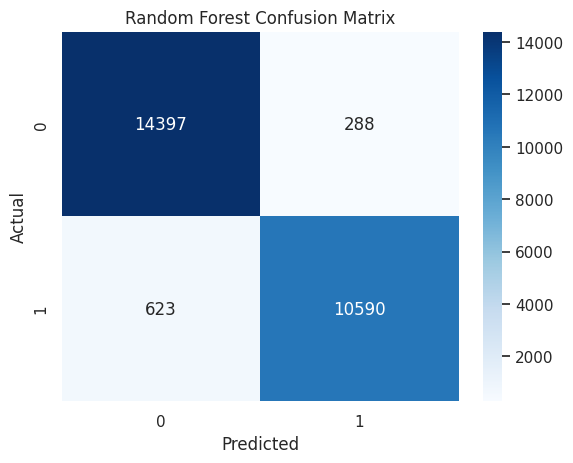

In [ ]:
# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<ipython-input-301-c49ff824f42d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='viridis')


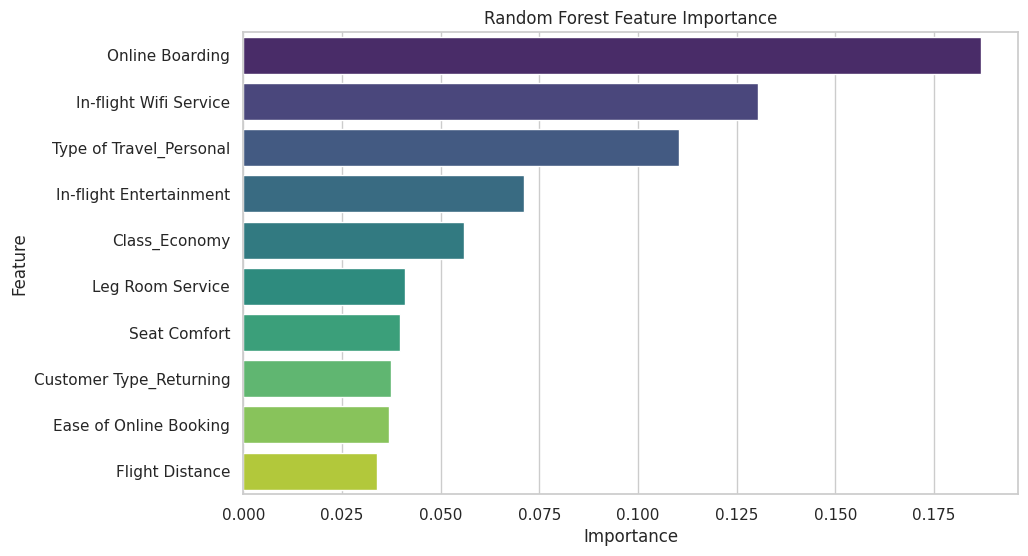

In [ ]:
# Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='viridis')
plt.title('Random Forest Feature Importance')
plt.show()

**Findings**

* Accuracy: ~96%, ROC-AUC Score: ~99%. The model is excellent at prediction and outperforms Logistic Regression significantly.
* Very high precision and recall values (all above 0.94)

## **XGBoost**

In [ ]:
# Train XGBoost
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Evaluate
y_pred_xgb = xgb.predict(X_test)
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14685
           1       0.97      0.95      0.96     11213

    accuracy                           0.96     25898
   macro avg       0.97      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



In [ ]:
# ROC-AUC Score
y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]
print("XGBoost ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob_xgb))

XGBoost ROC-AUC Score: 0.9954520600738824


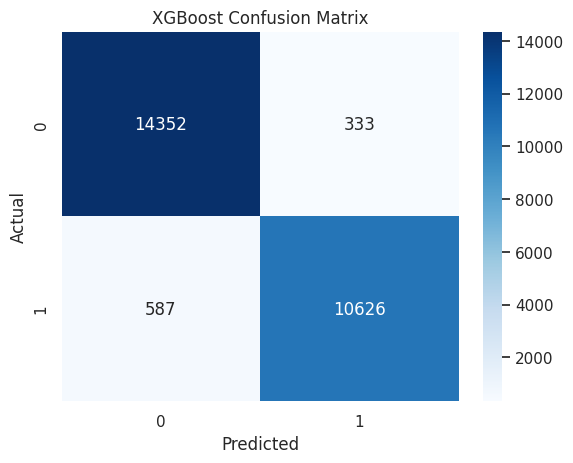

In [ ]:
# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<ipython-input-306-a7b1184c2fc1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_xgb.head(10), palette='viridis')


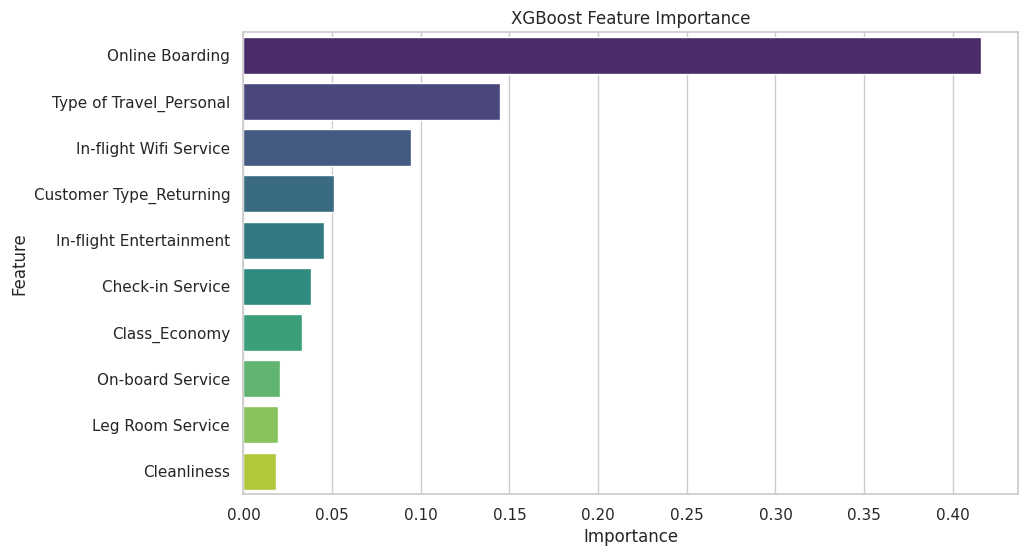

In [ ]:
# Feature Importance for XGBoost
feature_importance_xgb = pd.DataFrame({'Feature': X.columns, 'Importance': xgb.feature_importances_})
feature_importance_xgb = feature_importance_xgb.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_xgb.head(10), palette='viridis')
plt.title('XGBoost Feature Importance')
plt.show()

**Findings**

* Accuracy: ~96%, ROC-AUC Score: ~99%. The model is excellent at prediction and outperforms Logistic Regression significantly.
* Very high precision and recall values (all above 0.95)
* Highest performing model out of the 3

## **Models Comparison**

In [ ]:
# Compare model performance
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracy_scores = [accuracy_score(y_test, y_pred_log), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_xgb)]
roc_auc_scores = [roc_auc_score(y_test, y_pred_prob_log), roc_auc_score(y_test, y_pred_prob_rf), roc_auc_score(y_test, y_pred_prob_xgb)]

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores,
    'ROC-AUC Score': roc_auc_scores
})

# Display the comparison
print("\nModel Comparison:")
print(comparison_df)


Model Comparison:
                 Model  Accuracy  ROC-AUC Score
0  Logistic Regression  0.872654       0.924744
1        Random Forest  0.964824       0.994214
2              XGBoost  0.964476       0.995452


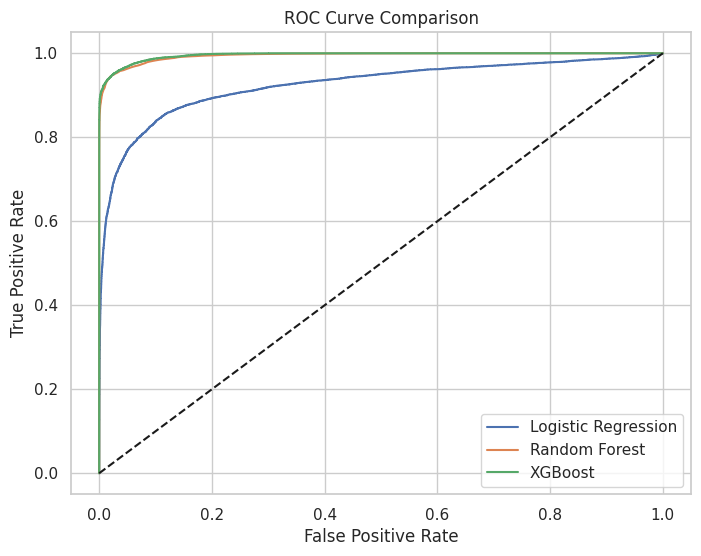

In [ ]:
# Plot ROC Curves for all models
plt.figure(figsize=(8, 6))
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)

plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

**Findings**

* XGBoost has the highest accuracy (96%) and ROC-AUC score (99%). Random Forest performs slightly worse but is still highly accurate. Logistic Regression is the least accurate.
* Discussion: While XGBoost is the best model for prediction, Random Forest offers a good balance between performance and interpretability. Logistic Regression is useful for understanding the impact of individual features but is not suitable for final predictions.

## **Actual Predictions**

In [ ]:
# Create a DataFrame to compare actual vs predicted values
results_df = pd.DataFrame({
    'Actual': y_test,
    'Logistic Regression': y_pred_log,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb
})

# Display the first 30 predictions
print("\nFirst 10 Actual vs Predicted Values:")
print(results_df.head(30))


First 10 Actual vs Predicted Values:
        Actual  Logistic Regression  Random Forest  XGBoost
98181        0                    0              0        0
24977        0                    0              0        0
69262        1                    0              1        1
90494        1                    1              1        1
36203        1                    1              1        1
25156        1                    1              1        1
24471        1                    1              1        1
47411        0                    0              0        0
93656        1                    1              1        1
88670        0                    0              0        1
67663        0                    1              0        0
53023        1                    1              1        1
126541       0                    0              0        0
87274        0                    1              0        0
67163        1                    0              0        0
23

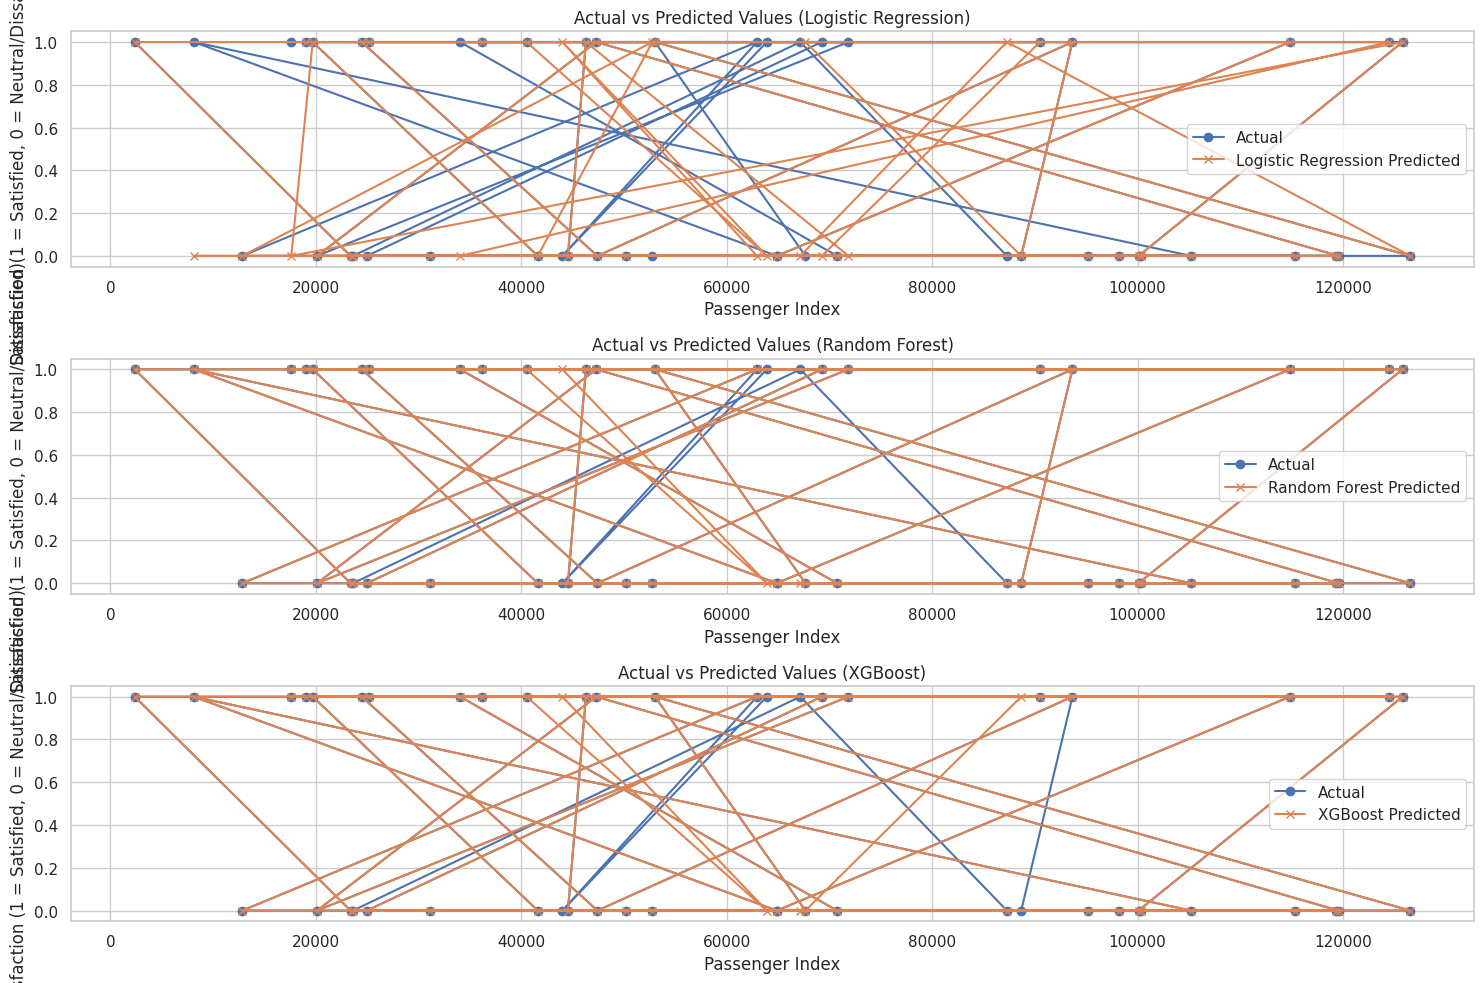

In [ ]:
# Plot actual vs predicted values for all models
plt.figure(figsize=(15, 10))

# Plot for Logistic Regression
plt.subplot(3, 1, 1)
plt.plot(results_df['Actual'].head(50), label='Actual', marker='o')
plt.plot(results_df['Logistic Regression'].head(50), label='Logistic Regression Predicted', marker='x')
plt.title('Actual vs Predicted Values (Logistic Regression)')
plt.xlabel('Passenger Index')
plt.ylabel('Satisfaction (1 = Satisfied, 0 = Neutral/Dissatisfied)')
plt.legend()

# Plot for Random Forest
plt.subplot(3, 1, 2)
plt.plot(results_df['Actual'].head(50), label='Actual', marker='o')
plt.plot(results_df['Random Forest'].head(50), label='Random Forest Predicted', marker='x')
plt.title('Actual vs Predicted Values (Random Forest)')
plt.xlabel('Passenger Index')
plt.ylabel('Satisfaction (1 = Satisfied, 0 = Neutral/Dissatisfied)')
plt.legend()

# Plot for XGBoost
plt.subplot(3, 1, 3)
plt.plot(results_df['Actual'].head(50), label='Actual', marker='o')
plt.plot(results_df['XGBoost'].head(50), label='XGBoost Predicted', marker='x')
plt.title('Actual vs Predicted Values (XGBoost)')
plt.xlabel('Passenger Index')
plt.ylabel('Satisfaction (1 = Satisfied, 0 = Neutral/Dissatisfied)')
plt.legend()

plt.tight_layout()
plt.show()